
=== 3036461.csv ===

Missing values:
created_at    0
entry_id      0
field1        0
field2        0
field3        0
dtype: int64

Shape after cleaning: (31, 3)
Shape after outlier removal: (31, 3)

Correlation matrix:


,field1,field2,field3
field1,1.0,1.0,1.0
field2,1.0,1.0,1.0
field3,1.0,1.0,1.0


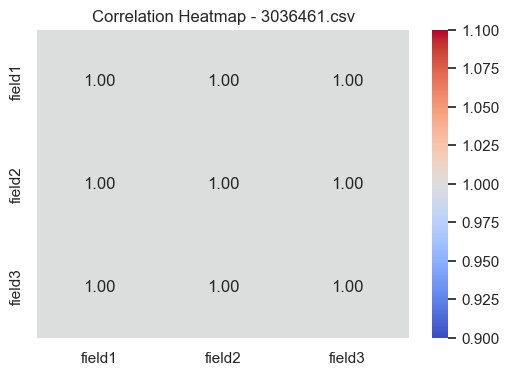

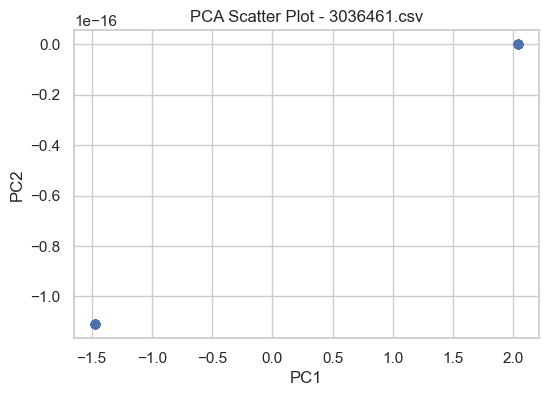


=== 1350261.csv ===

Missing values:
created_at    0
entry_id      0
field1        0
field2        0
field3        0
field4        0
field5        0
field6        0
field7        0
field8        0
dtype: int64

Shape after cleaning: (100, 8)
Shape after outlier removal: (93, 8)

Correlation matrix:


,field1,field2,field3,field4,field5,field6,field7,field8
field1,1.000000,0.896045,0.973396,-0.943946,0.750092,0.969477,0.849851,0.955665
field2,0.896045,1.000000,0.900779,-0.925684,0.483202,0.890514,0.748440,0.965572
field3,0.973396,0.900779,1.000000,-0.973344,0.737837,0.997759,0.874918,0.969145
field4,-0.943946,-0.925684,-0.973344,1.000000,-0.725112,-0.959828,-0.800936,-0.986906
field5,0.750092,0.483202,0.737837,-0.725112,1.000000,0.720538,0.557247,0.680998
field6,0.969477,0.890514,0.997759,-0.959828,0.720538,1.000000,0.891612,0.956033
field7,0.849851,0.748440,0.874918,-0.800936,0.557247,0.891612,1.000000,0.787525
field8,0.955665,0.965572,0.969145,-0.986906,0.680998,0.956033,0.787525,1.000000


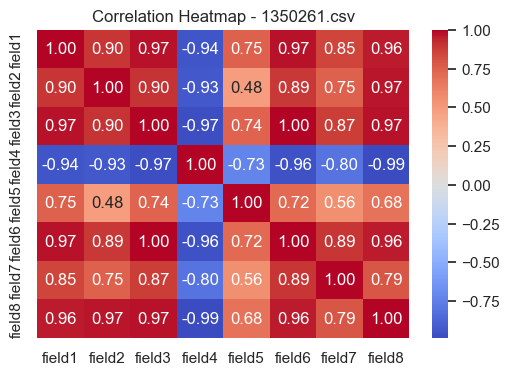

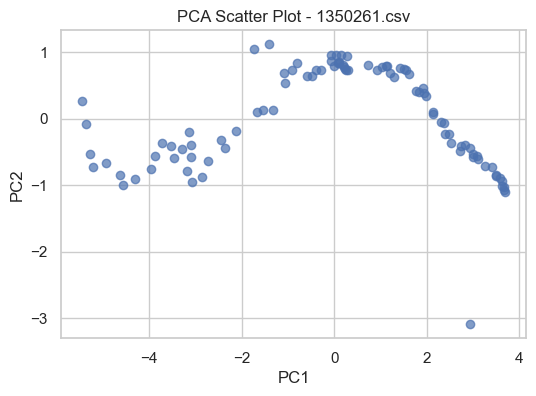


=== 1321079.csv ===

Missing values:
created_at    0
entry_id      0
field1        0
field2        0
field3        0
field4        0
dtype: int64

Shape after cleaning: (100, 4)
Shape after outlier removal: (100, 4)

Correlation matrix:


,field1,field2,field3,field4
field1,1.000000,-0.481727,0.958919,-0.515549
field2,-0.481727,1.000000,-0.554816,0.997609
field3,0.958919,-0.554816,1.000000,-0.588808
field4,-0.515549,0.997609,-0.588808,1.000000


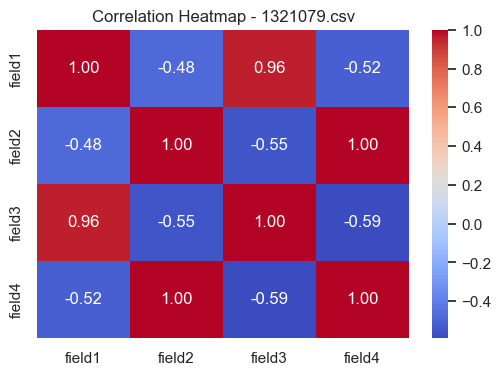

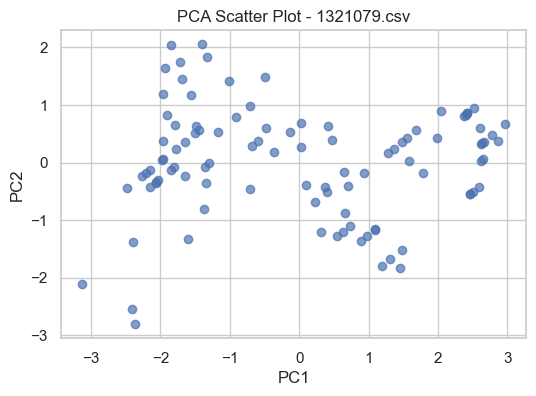


=== 518150.csv ===

Missing values:
created_at     0
entry_id       0
field1        48
field2        63
field3        48
field4        52
field5        48
field6        52
field7        48
field8        52
dtype: int64

Shape after cleaning: (100, 8)
Shape after outlier removal: (93, 8)

Correlation matrix:


,field1,field2,field3,field4,field5,field6,field7,field8
field1,1.000000,-0.702755,0.845845,0.003162,0.025688,0.000583,0.798244,-0.000329
field2,-0.702755,1.000000,-0.547134,0.002112,0.267205,0.000389,-0.496202,-0.000220
field3,0.845845,-0.547134,1.000000,0.003526,0.217715,0.000650,0.568452,-0.000367
field4,0.003162,0.002112,0.003526,1.000000,0.004494,0.716175,0.000612,-0.683037
field5,0.025688,0.267205,0.217715,0.004494,1.000000,0.000828,-0.307416,-0.000468
field6,0.000583,0.000389,0.000650,0.716175,0.000828,1.000000,0.000113,-0.897557
field7,0.798244,-0.496202,0.568452,0.000612,-0.307416,0.000113,1.000000,-0.000064
field8,-0.000329,-0.000220,-0.000367,-0.683037,-0.000468,-0.897557,-0.000064,1.000000


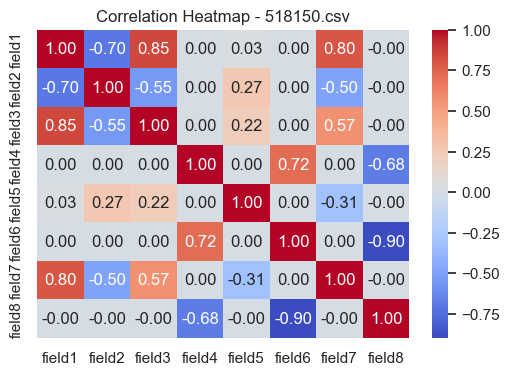

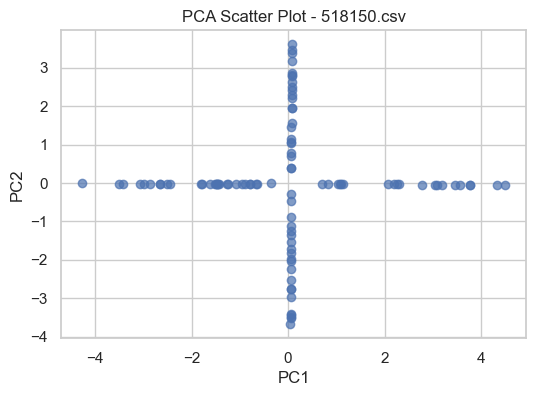

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

sns.set(style="whitegrid")

def analyze_dataset(df, name):
    print(f"\n=== {name} ===")
    print("\nMissing values:")
    print(df.isnull().sum())

    numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['entry_id'], errors='ignore')

    if numeric_df.isnull().sum().sum() == 0:
        clean_df = numeric_df.dropna()
    else:
        clean_df = numeric_df.fillna(numeric_df.mean())

    print(f"\nShape after cleaning: {clean_df.shape}")
    zscore_df = clean_df[(np.abs(zscore(clean_df)) < 3).all(axis=1)]
    print(f"Shape after outlier removal: {zscore_df.shape}")

    corr_matrix = zscore_df.corr()
    print("\nCorrelation matrix:")
    display(corr_matrix)

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap - {name}")
    plt.show()

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(zscore_df)

    pca = PCA(n_components=2)
    pcs = pca.fit_transform(scaled_data)

    plt.figure(figsize=(6, 4))
    plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA Scatter Plot - {name}")
    plt.show()

datasets = {
    "3036461.csv": pd.read_csv("3036461.csv"),
    "1350261.csv": pd.read_csv("1350261.csv"),
    "1321079.csv": pd.read_csv("1321079.csv"),
    "518150.csv": pd.read_csv("518150.csv"),
}

for name, df in datasets.items():
    analyze_dataset(df, name)


### Explaination

**I analyzed four datasets (3036461.csv, 1350261.csv, 1321079.csv, and 518150.csv) using the same pipeline of correlation and PCA. I checked for missing values, and for 518150.csv, I imputed NaNs with column means, while I removed outliers using the Z-score method. I then generated correlation matrices and heatmaps, which showed strong positive correlations in the binary dataset, moderate correlations in the environmental dataset, and very strong paired correlations in the temperature-humidity dataset, while the imputed sensor dataset showed weaker but usable relationships. Finally, I applied PCA and plotted scatter plots to visualize the main patterns and clustering, which provided clear insights into the structure of each dataset.**